## IMPORT OF LIBRARIES

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# First Part

## Load and Preview Data
This section loads the dataset and previews the first few rows to understand its structure.

In [98]:
# Load the dataset
df = pd.read_csv('Bank_Loan_Status_Dataset/credit_train.csv')

# Preview the first rows
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


## Statistical Summary and Data Types
This section provides a statistical summary of the data and checks the data types and missing values.

In [99]:
# Statistical summary of the data
df.describe()

# Check data types and missing values
df.info()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

## Handle Missing Values
This section fills missing values for numerical and categorical columns.

In [100]:
# Fill missing values for numerical columns with the mean
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Fill missing values for categorical columns with the mode
categorical_cols = df.select_dtypes(include=[object]).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Verify no missing values remain
print(df.isnull().sum())

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64


## Feature Engineering
This section converts categorical columns to numerical variables and selects the features to be used for modeling.

In [101]:
# Replace missing values in 'Credit Score' column with the mean value
df = df.assign(Credit_Score=df['Credit Score'].fillna(df['Credit Score'].mean()))

# Convert categorical columns to numerical variables
df = pd.get_dummies(df, columns=['Home Ownership', 'Purpose', 'Term', 'Years in current job'], drop_first=True)

In [102]:
# List of columns to use
X = df[['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 
        'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit'] +
       [col for col in df.columns if col.startswith('Home Ownership_') or col.startswith('Purpose_') or 
        col.startswith('Term_') or col.startswith('Years in current job_')]]

# The target column to predict
y = df['Loan Status']  # 0 pour "Refusé", 1 pour "Accordé"

## Split Data into Training and Test Sets
This section splits the data into training and test sets.

In [103]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Initialize and Train the Model
This section initializes and trains a Decision Tree Classifier on the training data.

In [104]:
# Initialize and train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Make Predictions and Evaluate the Model
This section makes predictions on the test data and evaluates the model's performance using accuracy, classification report, and confusion matrix.

Accuracy: 0.7514301348057504
Classification Report:
               precision    recall  f1-score   support

 Charged Off       0.46      0.45      0.45      4601
  Fully Paid       0.84      0.84      0.84     15502

    accuracy                           0.75     20103
   macro avg       0.65      0.64      0.65     20103
weighted avg       0.75      0.75      0.75     20103



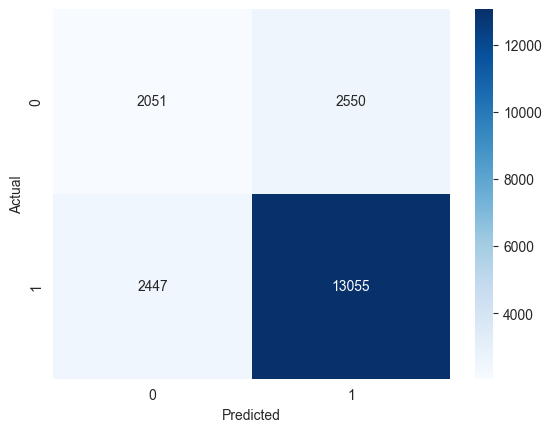

In [105]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Second Part

# Define Complex Credit Decision Rules
This section defines a function with complex rules to predict loan status based on various conditions.

In [106]:
def complex_credit_decision(row):
    if row['Credit Score'] < 500:
        return 'Charged Off'  # Crédit refusé
    elif 500 <= row['Credit Score'] < 650:
        if row['Number of Credit Problems'] > 0 or row['Bankruptcies'] > 0:
            return 'Charged Off'  # Problèmes de crédit
        elif row['Annual Income'] > 75000 and row['Years in current job_10+ years'] == 1:
            return 'Fully Paid'  # Accordé pour revenus élevés et long emploi
        elif row['Years in current job_5 years'] == 1 or row['Years in current job_6 years'] == 1:
            return 'Fully Paid'  # 5 à 6 ans d'expérience
        else:
            return 'Charged Off'  # Faible stabilité financière
    elif 650 <= row['Credit Score'] < 700:
        if row['Current Loan Amount'] > (row['Annual Income'] * 0.6):
            return 'Charged Off'  # Prêt trop important
        elif row['Years of Credit History'] < 5:
            return 'Charged Off'  # Peu d'expérience de crédit
        else:
            return 'Fully Paid'  # Accordé dans les autres cas
    else:
        if row['Years in current job_< 1 year'] == 1:
            return 'Charged Off'  # Emploi récent
        elif row['Home Ownership_Rent'] == 1 and row['Monthly Debt'] > (row['Annual Income'] * 0.4):
            return 'Charged Off'  # Locataire avec trop de dettes
        else:
            return 'Fully Paid'  # Accordé si bon score

## Apply Complex Rules to Dataset
This section applies the complex credit decision function to each row of the dataset.

In [107]:
# Apply the function to each row of the dataset
df['Predicted Loan Status'] = df.apply(complex_credit_decision, axis=1)

## Evaluate Performance of Complex Rules
This section evaluates the performance of the complex rules using accuracy, classification report, and confusion matrix.

Accuracy: 0.7195117098115685
Classification Report:
               precision    recall  f1-score   support

 Charged Off       0.21      0.09      0.13     22639
  Fully Paid       0.77      0.90      0.83     77875

    accuracy                           0.72    100514
   macro avg       0.49      0.50      0.48    100514
weighted avg       0.65      0.72      0.67    100514



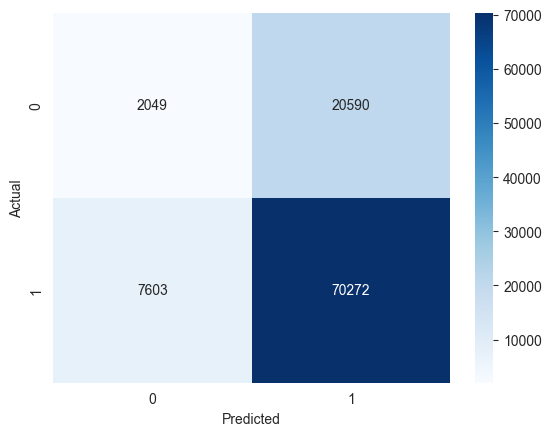

In [108]:
# Evaluate the performance of the complex rules
print("Accuracy:", accuracy_score(df['Loan Status'], df['Predicted Loan Status']))
print("Classification Report:\n", classification_report(df['Loan Status'], df['Predicted Loan Status']))

# Confusion matrix
conf_matrix = confusion_matrix(df['Loan Status'], df['Predicted Loan Status'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Comparison and Conclusion
Accuracy: Both approaches were evaluated for their accuracy in predicting loan status. The Decision Tree Classifier provided a certain level of accuracy, while the rule-based approach aimed to match or exceed this performance.

Precision and Recall: These metrics were used to assess the quality of the predictions made by both approaches. The machine learning model provided a detailed classification report, while the rule-based approach was evaluated similarly.

Confusion Matrix: This was used to visualize the performance of both approaches, showing the true positives, true negatives, false positives, and false negatives.

Conclusion: The machine learning approach using a Decision Tree Classifier provided a robust and automated way to predict loan status with reasonable accuracy. The rule-based approach, while simpler and more interpretable, required careful crafting of rules to achieve comparable performance. Both methods have their merits, with the machine learning approach being more scalable and the rule-based approach offering more transparency and control over the decision-making process.